In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('EROSMEDIA.NS.CSV')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-07,43.099998,50.000000,43.099998,45.500000,45.500000,6779384.0
1,2019-06-10,46.900002,48.250000,40.950001,40.950001,40.950001,2236241.0
2,2019-06-11,36.900002,36.900002,36.900002,36.900002,36.900002,171164.0
3,2019-06-12,33.250000,33.250000,33.250000,33.250000,33.250000,144662.0
4,2019-06-13,31.600000,31.600000,31.600000,31.600000,31.600000,34882.0
...,...,...,...,...,...,...,...
239,2020-06-01,15.850000,16.299999,15.500000,16.100000,16.100000,334179.0
240,2020-06-02,16.400000,16.650000,15.900000,16.400000,16.400000,548356.0
241,2020-06-03,16.850000,16.850000,16.400000,16.600000,16.600000,479396.0
242,2020-06-04,16.650000,17.400000,16.000000,17.150000,17.150000,740725.0


In [69]:
df1=df.reset_index()['Close'].values.reshape(-1,1)
df1.shape
#df1 = df1.astype('float32')



(244, 1)

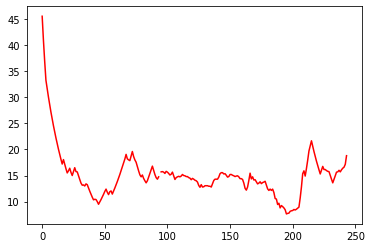

In [70]:
plt.plot(df1,color='red')

In [71]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
df1=sc.fit_transform(df1)
df1

array([[1.        ],
       [0.87978867],
       [0.77278737],
       [0.67635403],
       [0.6327609 ],
       [0.59180975],
       [0.55217963],
       [0.51519155],
       [0.47952441],
       [0.44649931],
       [0.41479524],
       [0.38441218],
       [0.35535007],
       [0.32760896],
       [0.30118888],
       [0.27608983],
       [0.25231178],
       [0.2747688 ],
       [0.25099075],
       [0.22853366],
       [0.20739762],
       [0.21796565],
       [0.23117569],
       [0.21003963],
       [0.19418758],
       [0.21400264],
       [0.2338177 ],
       [0.21400264],
       [0.21268164],
       [0.19286658],
       [0.17437252],
       [0.15587847],
       [0.14531044],
       [0.14663144],
       [0.14134742],
       [0.15191546],
       [0.14795244],
       [0.13077939],
       [0.11492734],
       [0.0990753 ],
       [0.08454425],
       [0.07133421],
       [0.07397622],
       [0.07265522],
       [0.06208719],
       [0.04887715],
       [0.06076618],
       [0.072

In [72]:
train_size = int(len(df1) * 0.65)
test_size = len(df1) - train_size
train_data, test_data = df1[0:train_size,:], df1[train_size:len(df1),:]
len(train_data), len(test_data)
#test_data

(158, 86)

In [73]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [74]:
# reshape into X=t and Y=t+1
look_back = 20
X_train, y_train = create_dataset(train_data, look_back)
X_test, ytest = create_dataset(test_data, look_back)


In [75]:
X_train.shape,y_train.shape

((137, 20), (137,))

In [76]:
X_test.shape, ytest.shape

((65, 20), (65,))

In [77]:
ytest

array([0.1651255 , 0.14531044, 0.12681638, 0.11889036, 0.12549538,
       0.11889036, 0.12549538, 0.10832232, 0.07793923, 0.07529723,
       0.04755614, 0.05416116, 0.03038309, 0.04227213, 0.03698811,
       0.03038309, 0.02113606, 0.        , 0.00264201, 0.00396301,
       0.01321004, 0.01585205, 0.01717305, 0.02245707, 0.01981506,
       0.02377807, 0.02906209, 0.0343461 , 0.08058124, 0.13606341,
       0.20343461, 0.21796565, 0.19154557, 0.22985469, 0.27212684,
       0.31836198, 0.34346103, 0.36988111, 0.34214003, 0.31571995,
       0.29062087, 0.2668428 , 0.24438573, 0.22324967, 0.20211361,
       0.22192864, 0.24042272, 0.22457067, 0.22457067, 0.21928666,
       0.21532365, 0.21400264, 0.19418758, 0.17569353, 0.15719947,
       0.17437252, 0.19286658, 0.21136063, 0.21268164, 0.22060766,
       0.21268164, 0.22324967, 0.23117569, 0.23645971, 0.25099075])

In [78]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_train.shape,X_test.shape

((137, 20, 1), (65, 20, 1))

In [79]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [80]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(20,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 20, 50)            10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 20, 50)            20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [81]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
3/3 [==============================] - 1s 302ms/step - loss: nan - val_loss: nan
Epoch 2/100
3/3 [==============================] - 0s 27ms/step - loss: nan - val_loss: nan
Epoch 3/100
3/3 [==============================] - 0s 23ms/step - loss: nan - val_loss: nan
Epoch 4/100
3/3 [==============================] - 0s 23ms/step - loss: nan - val_loss: nan
Epoch 5/100
3/3 [==============================] - 0s 23ms/step - loss: nan - val_loss: nan
Epoch 6/100
3/3 [==============================] - 0s 23ms/step - loss: nan - val_loss: nan
Epoch 7/100
3/3 [==============================] - 0s 25ms/step - loss: nan - val_loss: nan
Epoch 8/100
3/3 [==============================] - 0s 23ms/step - loss: nan - val_loss: nan
Epoch 9/100
3/3 [==============================] - 0s 23ms/step - loss: nan - val_loss: nan
Epoch 10/100
3/3 [==============================] - 0s 23ms/step - loss: nan - val_loss: nan
Epoch 11/100
3/3 [==============================] - 0s 23ms/step - loss: nan -

In [54]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


In [55]:
#Transformback to original form
train_predict=sc.inverse_transform(train_predict)
test_predict=sc.inverse_transform(test_predict)

In [17]:
len(test_data)

89

In [18]:
x_input=test_data[69:].reshape(1,-1)
x_input.shape

(1, 20)

In [19]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.5281250476837158,
 0.574999988079071,
 0.6000000238418579,
 0.5874999761581421,
 0.6187500357627869,
 0.6062500476837158,
 0.628125011920929,
 0.6500000357627869,
 0.6000000238418579,
 0.621874988079071,
 0.6312499642372131,
 0.6812500357627869,
 0.721875011920929,
 0.7718749642372131,
 0.8031249642372131,
 0.8124999403953552,
 0.7437499165534973,
 0.6781250834465027,
 0.5937500596046448,
 0.581250011920929]

In [20]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=20
i=0
while(i<30):
    
    if(len(temp_input)>20):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.5861809]
21
1 day input [0.57499999 0.60000002 0.58749998 0.61875004 0.60625005 0.62812501
 0.65000004 0.60000002 0.62187499 0.63124996 0.68125004 0.72187501
 0.77187496 0.80312496 0.81249994 0.74374992 0.67812508 0.59375006
 0.58125001 0.58618093]
1 day output [[0.5458656]]
2 day input [0.60000002 0.58749998 0.61875004 0.60625005 0.62812501 0.65000004
 0.60000002 0.62187499 0.63124996 0.68125004 0.72187501 0.77187496
 0.80312496 0.81249994 0.74374992 0.67812508 0.59375006 0.58125001
 0.58618093 0.5458656 ]
2 day output [[0.53283995]]
3 day input [0.58749998 0.61875004 0.60625005 0.62812501 0.65000004 0.60000002
 0.62187499 0.63124996 0.68125004 0.72187501 0.77187496 0.80312496
 0.81249994 0.74374992 0.67812508 0.59375006 0.58125001 0.58618093
 0.5458656  0.53283995]
3 day output [[0.5381062]]
4 day input [0.61875004 0.60625005 0.62812501 0.65000004 0.60000002 0.62187499
 0.63124996 0.68125004 0.72187501 0.77187496 0.80312496 0.81249994
 0.74374992 0.67812508 0.59375006 0.58125001 0

In [21]:
day_new=np.arange(1,21)
day_pred=np.arange(21,51)

import matplotlib.pyplot as plt

In [22]:
len(df1),len(lst_output)

(254, 30)

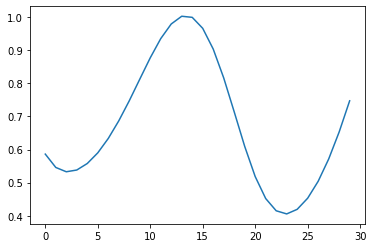

In [57]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[254:])